In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.base import clone
from sklearn.metrics import f1_score


# 3 digits floating points prints
pd.set_option('display.precision', 3)

rd_state = 42

# Load and Prepare the Dataset

In [2]:
# Load the dataset
data = pd.read_csv('data/stars_train_new.csv')
data.drop(columns=['obj_ID'], inplace=True)

# Display the first few rows of the dataset
data.head()

,alpha,delta,u,g,r,i,z,redshift,label
0,232.502,45.121,25.659,22.360,21.220,20.180,19.433,5.476e-01,0
1,129.290,48.672,20.283,20.093,19.965,19.582,19.424,1.674e+00,2
2,256.078,35.630,22.097,22.064,21.818,21.554,20.716,1.141e+00,2
3,15.237,11.872,22.534,21.769,21.771,21.594,22.151,4.469e-04,1
4,128.024,25.455,22.994,21.433,19.531,18.758,18.355,4.538e-01,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52295 entries, 0 to 52294
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     52295 non-null  float64
 1   delta     52295 non-null  float64
 2   u         52295 non-null  float64
 3   g         52295 non-null  float64
 4   r         52295 non-null  float64
 5   i         52295 non-null  float64
 6   z         52295 non-null  float64
 7   redshift  52295 non-null  float64
 8   label     52295 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 3.6 MB


In [4]:
# Split the dataset into features and label variable
X = data.drop(columns=['label'])
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_state)

In [5]:
# Standardize the features to have a mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis

In [6]:
data.describe()

,alpha,delta,u,g,r,i,z,redshift,label
count,52295.000,52295.000,52295.000,52295.000,52295.000,52295.000,52295.000,52295.000,52295.000
mean,179.950,24.177,22.163,20.692,19.677,19.096,18.770,0.573,0.569
std,95.693,19.418,2.269,2.054,1.860,1.752,1.755,0.726,0.777
min,0.013,-17.636,10.996,10.498,9.822,9.470,9.612,-0.010,0.000
25%,129.158,6.261,20.398,19.013,18.176,17.764,17.489,0.061,0.000
50%,182.750,23.289,22.315,21.191,20.164,19.420,19.010,0.435,0.000
75%,236.194,39.359,23.785,22.188,21.070,20.391,19.894,0.692,1.000
max,360.000,83.001,30.660,31.602,29.572,30.250,28.238,7.011,2.000


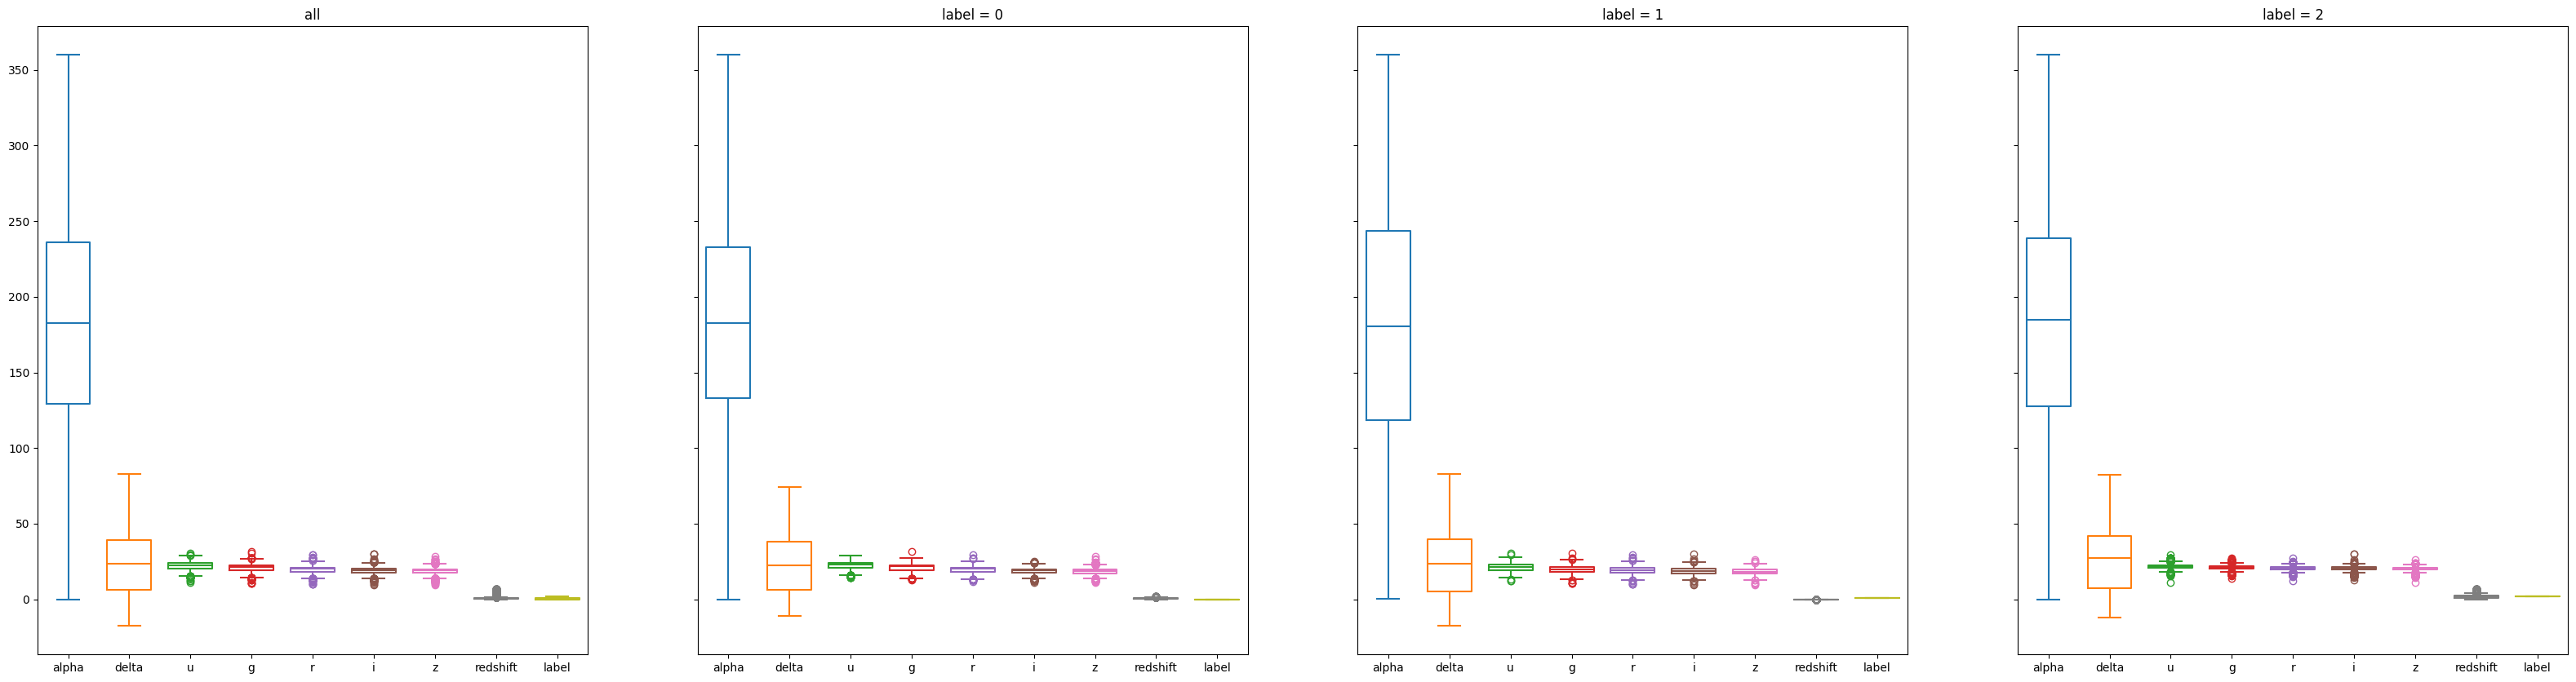

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(40, 10), sharey=True)

sns.boxplot(data=data, fill=False, gap=.1, ax = axs[0])
axs[0].set_title('all')
# axs[0].set_yscale('log')

for i in range(3) : 
    sns.boxplot(data=data[data.label == i], fill=False, gap=.1, ax=axs[i+1])
    axs[i+1].set_title('label = ' + str(i))
    # axs[i+1].set_yscale('log')


<Axes: >

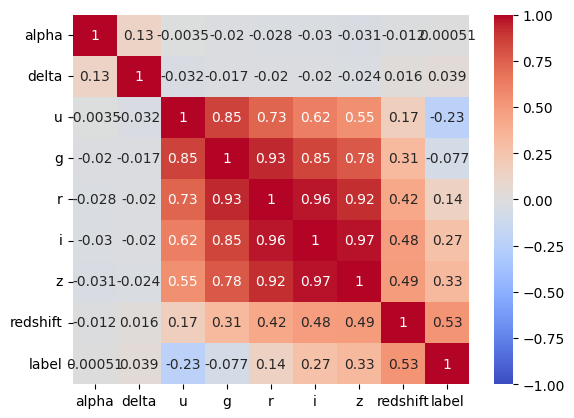

In [8]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm')

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'delta'}>, <Axes: title={'center': 'u'}>,
        <Axes: title={'center': 'g'}>, <Axes: title={'center': 'r'}>],
       [<Axes: title={'center': 'i'}>, <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'redshift'}>,
        <Axes: title={'center': 'label'}>, <Axes: >]], dtype=object)

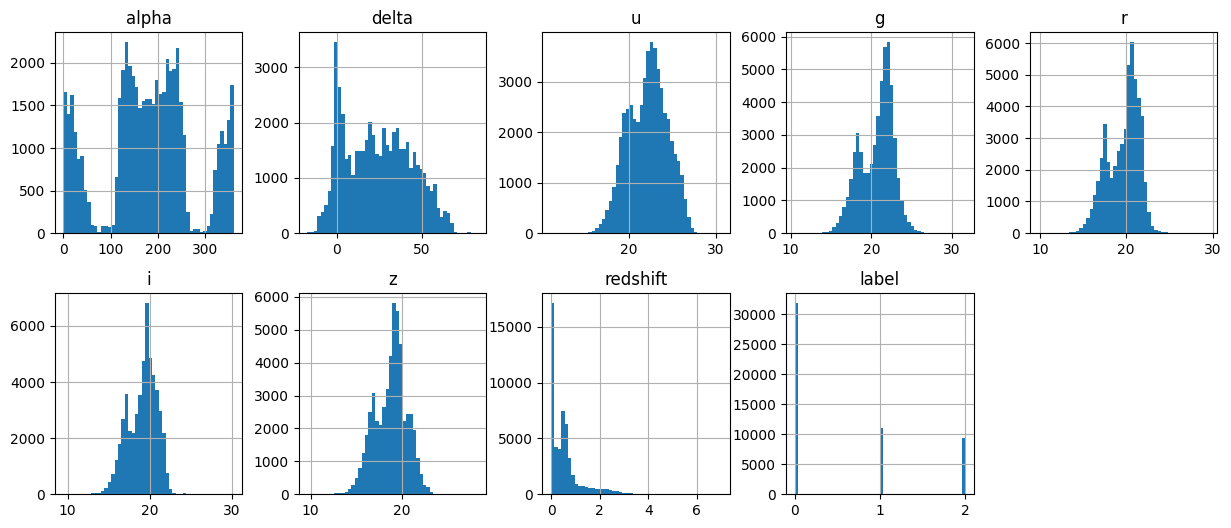

In [9]:
data.hist(bins=50, figsize=(15, 6), layout=(2, 5), )


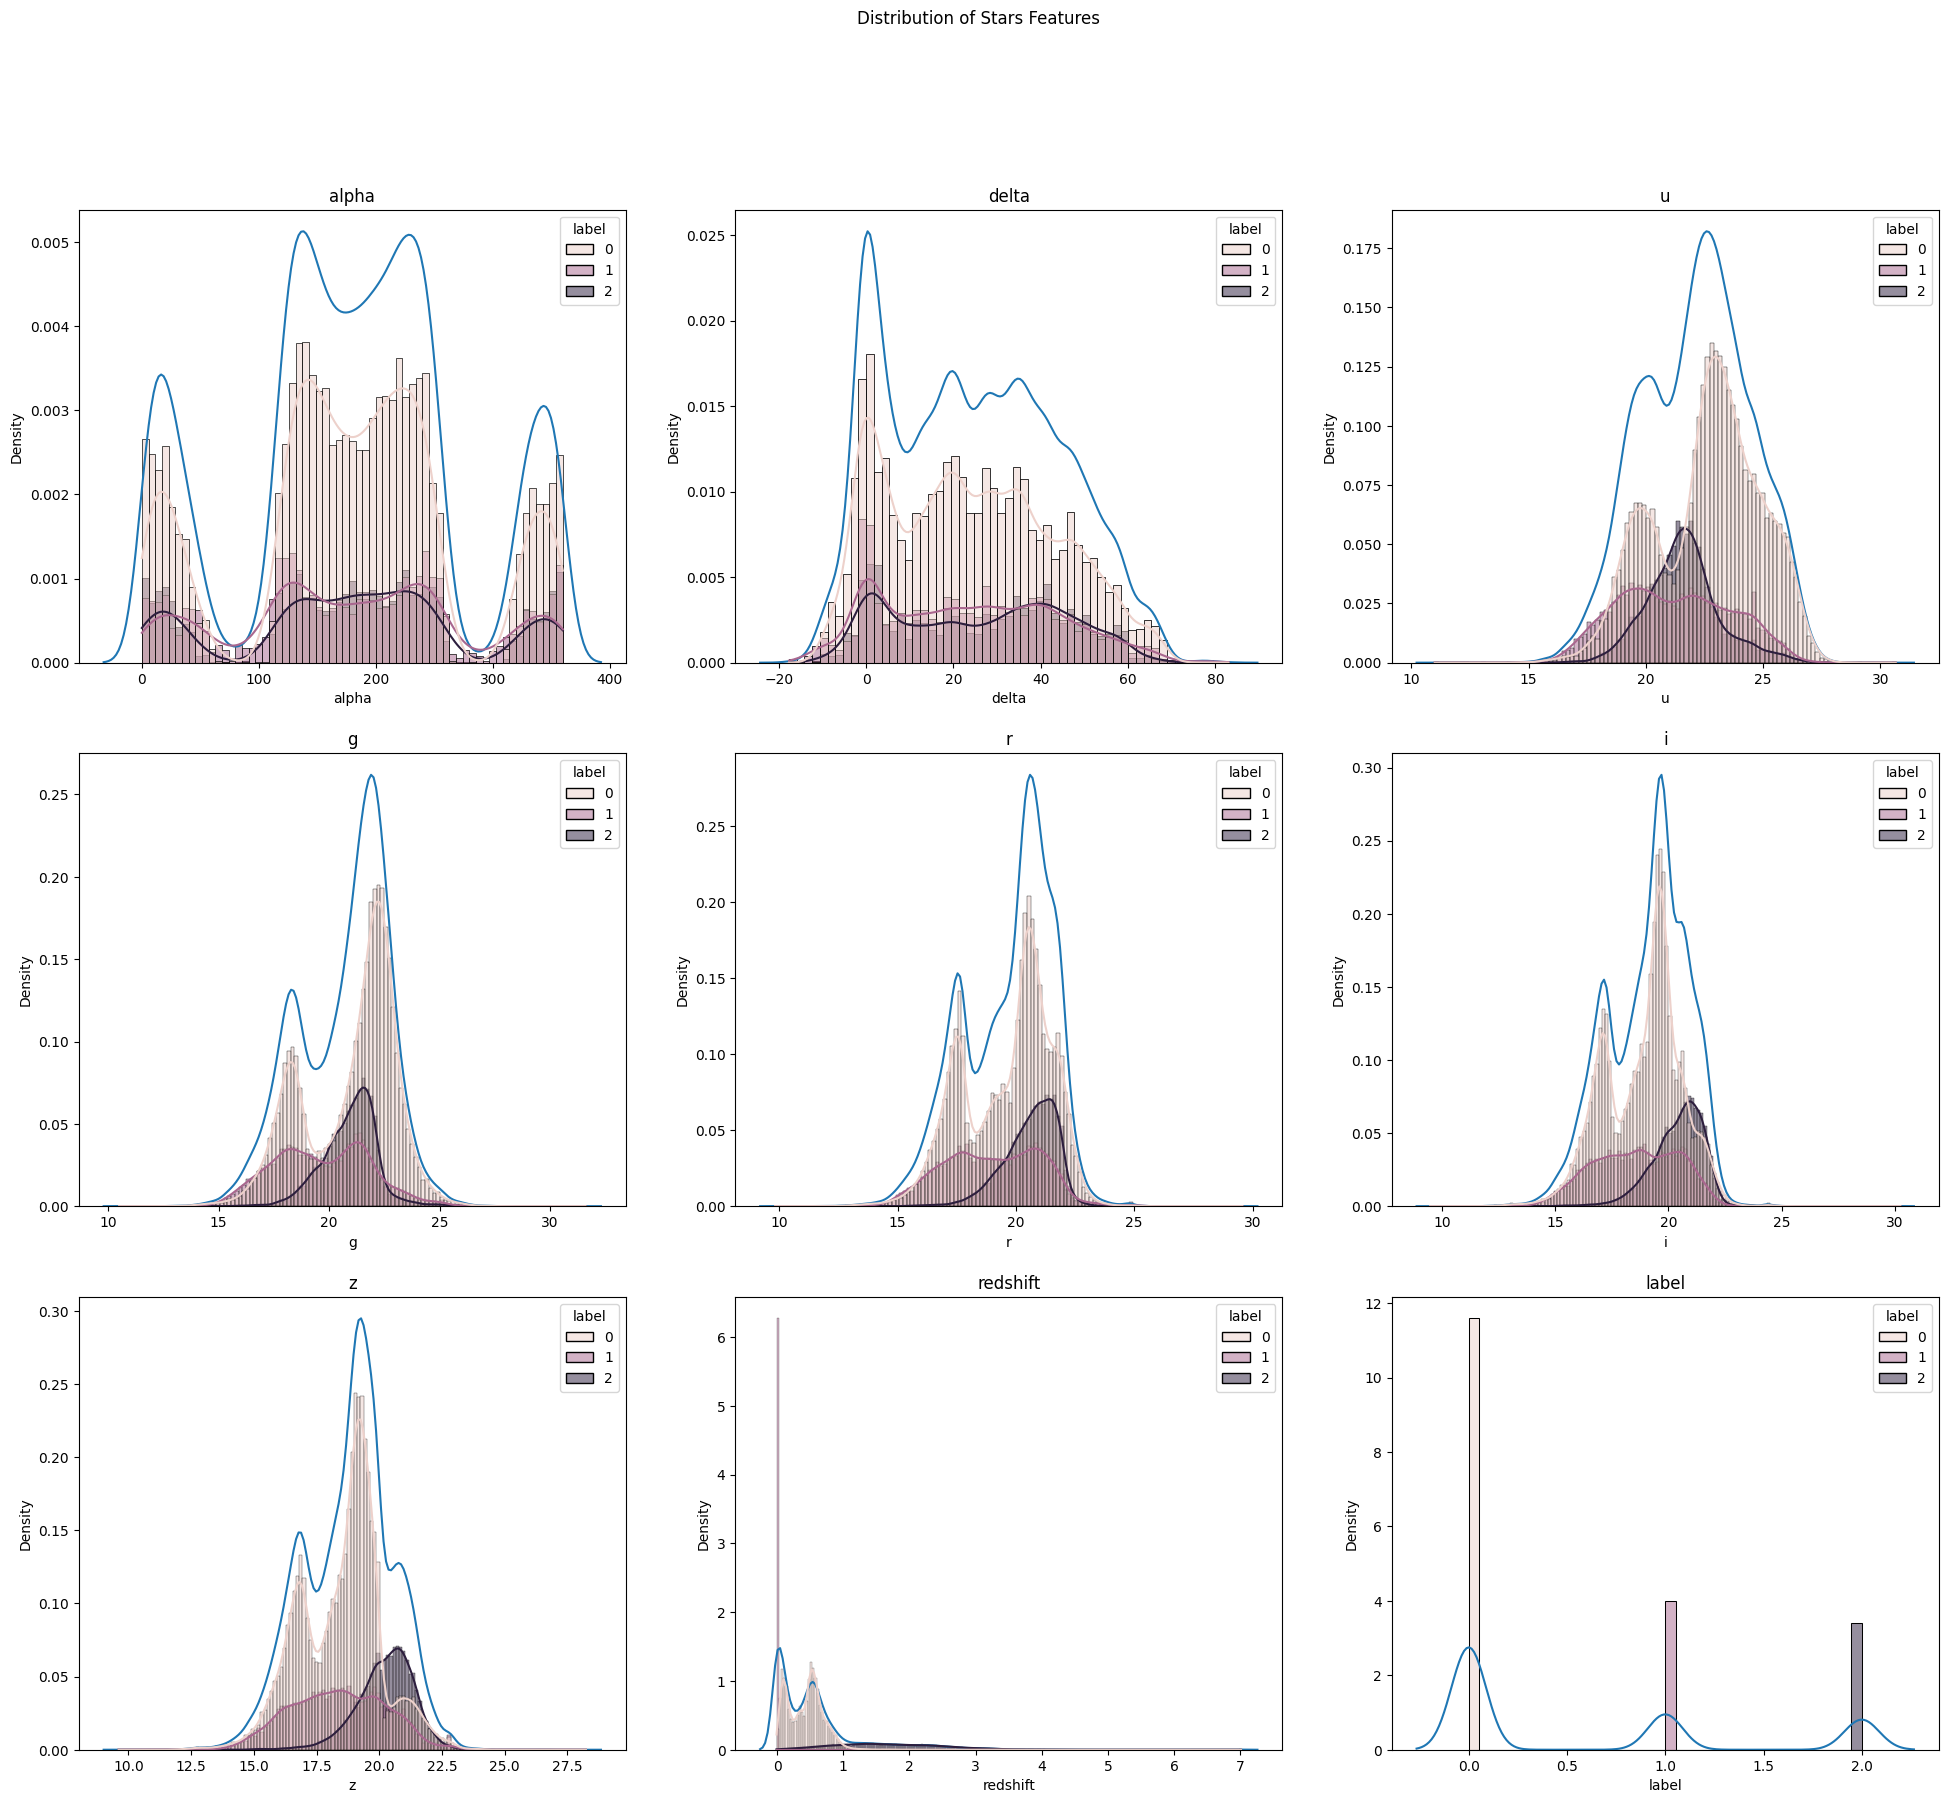

In [10]:
# observe the distribution of all the variables using sns
fig, axes = plt.subplots(3, 3, figsize=(24, 20))
fig.suptitle('Distribution of Stars Features')

for i, ax in enumerate(axes.flatten()):
    sns.kdeplot(data=data, x=data.columns[i], ax=ax, label='all labels distribution')
    sns.histplot(data=data, x=data.columns[i], ax=ax, kde=True, hue='label', stat='density') 

    ax.set_title(data.columns[i])
    
plt.show()


# Define Classification Models
Define the classification models to be used for comparison.

In [11]:
# Import the necessary regression models from sklearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


all_models = []
all_models_names = []
all_params = []


# Define the regression models and their hyperparameters

#1
model = LogisticRegression()
params = {}
all_models.append(model)
all_models_names.append('LogisticRegression')
all_params.append(params)


#2
model = RandomForestClassifier(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    'max_depth': [None, 10, 20],
}
all_models.append(model)
all_models_names.append('RandomForest')
all_params.append(params)


#3
model = ExtraTreesClassifier(random_state=rd_state)
params = {
    'n_estimators': [100, 500, 1000], 
    'max_depth': [None, 10, 20],
}
all_models.append(model)
all_models_names.append('ExtraTrees')
all_params.append(params)

#4
model = SVC(degree=5)
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 10], 
}
all_models.append(model)
all_models_names.append('SVM')
all_params.append(params)

#5
model = KNeighborsClassifier()
params = {
    'n_neighbors': [3, 5, 7, 9, 11], 
    # 'n_neighbors': np.round(np.linspace(2, 20, 5), 0).astype(int), 
    'weights': ['uniform', 'distance']
}
all_models.append(model)
all_models_names.append('KNeighbors')
all_params.append(params)


#6
model = MLPClassifier(max_iter=500, random_state=rd_state)
params = {
    'hidden_layer_sizes': [(8, 16), (8, 16, 32), (16, 32, 16)], 
    # 'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.01, 0.1, 1],
}
all_models.append(model)
all_models_names.append('MLP')
all_params.append(params)

##



def create_lists_for_subset(models_names):
    models = []
    params = []
    for i, name in enumerate(all_models_names) :
        if name in models_names:
            models.append(all_models[i])
            params.append(all_params[i])        


    return models, params

# models_names = ['RandomForest', 'ExtraTrees']#, 'KNeighbors']
models_names = all_models_names

models, params = create_lists_for_subset(models_names)

In [12]:
# # Import the necessary regression models from sklearn

# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.neural_network import MLPClassifier


# # Define the regression models
# logistic_regression = LogisticRegression()
# random_forest = RandomForestClassifier(random_state=rd_state)
# extra_trees = ExtraTreesClassifier(random_state=rd_state)
# svm = SVC()
# knn = KNeighborsClassifier()
# mlp = MLPClassifier(max_iter=500, random_state=rd_state)


# # Define the hyperparameters for each model
# logistic_regression_params = {}
# random_forest_params = {'n_estimators': [50, 100, 200, 500], 'max_depth': [None, 5, 10, 20, 50]}
# extra_trees_params = {'n_estimators': [50, 100, 200, 500], 'max_depth': [None, 5, 10, 20, 50]}
# svm_params = {'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}
# knn_params = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
# mlp_params = {'hidden_layer_sizes': [(4,), (4, 8, 16), (8, 16, 32)], 'activation': ['relu', 'tanh', 'logistic']}

# # Store everything in lists for easy access
# models = [logistic_regression, random_forest, extra_trees, svm, knn, mlp]
# models_names =  ['Logistic Regression', 'Random Forest', 'Extra Trees', 'SVM', 'KNN', 'MLP']
# params = [logistic_regression_params, random_forest_params, extra_trees_params, svm_params, knn_params, mlp_params]

# Hyperparameter Tuning with GridSearchCV
Use GridSearchCV to tune the hyperparameters of each model and find the best performing set of parameters.

In [13]:
# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Create empty lists to store the best parameters and best scores for each model
best_params = []
best_scores = []

# Loop through each model and its corresponding hyperparameters
for model, param in zip(models, params):
    print(model.__class__.__name__)
    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(clone(model), param, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best score
    best_params.append(grid_search.best_params_)
    best_scores.append(grid_search.best_score_)

# Create a dataframe to store the best parameters and best scores for each model
df_grid_search_score = pd.DataFrame({'Model': models_names, 'Best Parameters': best_params, 'Best Score': best_scores})

# Display the best parameters and best scores for each model
df_grid_search_score

LogisticRegression


c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\MEEEE\Documents\University\M2\app non superevise\projet\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

RandomForestClassifier
ExtraTreesClassifier
SVC
KNeighborsClassifier
MLPClassifier


,Model,Best Parameters,Best Score
0,LogisticRegression,{},0.953
1,RandomForest,"{'max_depth': 20, 'n_estimators': 1000}",0.975
2,ExtraTrees,"{'max_depth': None, 'n_estimators': 1000}",0.971
3,SVM,"{'C': 10, 'kernel': 'rbf'}",0.967
4,KNeighbors,"{'n_neighbors': 5, 'weights': 'distance'}",0.929
5,MLP,"{'alpha': 0.0001, 'hidden_layer_sizes': (8, 16)}",0.970


# Train and evaluate each best models 

In [14]:
# Train and evaluate each model using the best parameters

# Create empty lists to store the R-squared scores for each model
train_scores = []
test_scores = []

# Loop through each model and its corresponding best parameters
for model, param in zip(models, best_params):
    # Fit the model on the training data using the best parameters
    model.set_params(**param)
    model.fit(X_train, y_train)
    
    # Predict on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate the performance using the f1 weighted score
    train_score = f1_score(y_train, y_train_pred, average='weighted')
    test_score = f1_score(y_test, y_test_pred, average='weighted')
    
    # Append the R-squared scores to the corresponding lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a dataframe to store the R-squared scores for each model
df_test_score = pd.DataFrame({'Model': models_names, 'Train Score': train_scores, 'Test Score': test_scores})

# Display the R-squared scores for each model
df_grid_search_score['Test Score'] = df_test_score['Test Score']
df_test_score


,Model,Train Score,Test Score
0,LogisticRegression,0.954,0.955
1,RandomForest,0.999,0.974
2,ExtraTrees,1.000,0.970
3,SVM,0.969,0.967
4,KNeighbors,1.000,0.931
5,MLP,0.971,0.970


In [19]:
df_grid_search_score.columns = ['Model','Best Parameters', 'best_CVscore', 'test_score']

df_grid_search_score.drop(columns=['Best Parameters'])

,Model,best_CVscore,test_score
0,LogisticRegression,0.953,0.955
1,RandomForest,0.975,0.974
2,ExtraTrees,0.971,0.970
3,SVM,0.967,0.967
4,KNeighbors,0.929,0.931
5,MLP,0.970,0.970


In [20]:
# for the best model for the grid search score
i_model = df_grid_search_score['Best Score'].idxmax()

# for the best model on the "fake" test dataset
i_model = df_test_score['Test Score'].idxmax()

model = clone(models[i_model])
name_model = df_grid_search_score['Model'][i_model].replace(' ', '').replace('_', '')
param_model = df_grid_search_score['Best Parameters'][i_model]


# load the test dataset and make prediction using the best model 
train_data = pd.read_csv('data/stars_train_new.csv')
test_data = pd.read_csv('data/stars_test_new.csv')


X_submit_train, y_submit_train = train_data.drop(columns=['obj_ID', 'label']), train_data['label']

X_submit, obj_ID = test_data.drop(columns=['obj_ID']), test_data['obj_ID']

scaler = StandardScaler()
X_submit_train, X_submit = scaler.fit_transform(X_submit_train), scaler.transform(X_submit)


# Predict on the test data using random forest
model.fit(X_submit_train, y_submit_train)
y_submit = model.predict(X_submit)




In [21]:
# Save predictions to file
param_model_str = ''
for key, value in param_model.items():
    param_model_str += key + '_' + str(value) + '_'
param_model_str = param_model_str[:-1]


filename = f'submits/wine_submit_{name_model}_{param_model_str}_2.csv'

pd.DataFrame({'obj_ID':obj_ID, 'label':y_submit}).to_csv(filename, index=False)


In [28]:
# load the test dataset and make prediction using the best model 
test_data = pd.read_csv('data/wine_test.csv')
train_data = pd.read_csv('data/wine_train.csv')


X_submit_train, y_submit_train = train_data.drop(columns=['wine_ID', 'label']), train_data['label']

X_submit, wine_ids = test_data.drop(columns=['wine_ID']), test_data['wine_ID']

scaler = StandardScaler()
X_submit_train, X_submit = scaler.fit_transform(X_submit_train), scaler.transform(X_submit)


model = RandomForestRegressor(random_state=rd_state, **model_performance_tuned['Best Parameters'][1])

# Predict on the test data using random forest
model.fit(X_submit_train, y_submit_train)
y_submit = model.predict(X_submit)


In [30]:
pd.DataFrame({'wine_ID':wine_ids, 'label':y_submit}).to_csv('submits/wine_submit.csv', index=False)

In [31]:
model_performance_tuned0

,Model,Best Parameters,Best Score
0,Linear Regression,{},0.272
1,Random Forest,"{'max_depth': None, 'n_estimators': 500}",0.454
2,Extra Trees,"{'max_depth': 20, 'n_estimators': 200}",0.388
3,SVM,"{'C': 1, 'gamma': 'scale'}",0.375
4,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.435
5,Kernel Ridge,"{'alpha': 0.1, 'kernel': 'rbf'}",0.248
6,MLP,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.354


In [32]:
model_performance_tuned1

,Model,Best Parameters,Best Score
0,Linear Regression,{},0.333
1,Random Forest,"{'max_depth': 20, 'n_estimators': 200}",0.438
2,Extra Trees,"{'max_depth': 20, 'n_estimators': 100}",0.334
3,SVM,"{'C': 1, 'gamma': 'auto'}",0.377
4,KNN,"{'n_neighbors': 11, 'weights': 'distance'}",0.391
5,Kernel Ridge,"{'alpha': 10, 'kernel': 'poly'}",0.276
6,MLP,"{'activation': 'tanh', 'hidden_layer_sizes': (...",0.349


In [34]:
model0 = RandomForestRegressor(random_state=rd_state, **model_performance_tuned0['Best Parameters'][1])
model1 = RandomForestRegressor(random_state=rd_state, **model_performance_tuned1['Best Parameters'][1])


# load the test dataset and make prediction using the best model 
test_data = pd.read_csv('data/wine_test.csv')
train_data = pd.read_csv('data/wine_train.csv')


X_submit_train, y_submit_train = train_data.drop(columns=['wine_ID', 'label']), train_data['label']

X0_submit_train = X_submit_train[X_submit_train['wine_type'] == 0].drop(columns=['wine_type'])
X1_submit_train = X_submit_train[X_submit_train['wine_type'] == 1].drop(columns=['wine_type'])

y0_submit_train = y_submit_train[X_submit_train['wine_type'] == 0]
y1_submit_train = y_submit_train[X_submit_train['wine_type'] == 1]


X_submit, wine_ids = test_data.drop(columns=['wine_ID']), test_data['wine_ID']

X0_submit = X_submit[X_submit['wine_type'] == 0].drop(columns=['wine_type'])
wine_ids0 = wine_ids[X_submit['wine_type'] == 0]

X1_submit = X_submit[X_submit['wine_type'] == 1].drop(columns=['wine_type'])
wine_ids1 = wine_ids[X_submit['wine_type'] == 1]

scaler0, scaler1 = StandardScaler(), StandardScaler()
X0_submit_train, X0_submit = scaler0.fit_transform(X0_submit_train), scaler0.transform(X0_submit)
X1_submit_train, X1_submit = scaler1.fit_transform(X1_submit_train), scaler1.transform(X1_submit)


# Predict on the test data using random forest
model0.fit(X0_submit_train, y0_submit_train)
y0_submit = model0.predict(X0_submit)

model1.fit(X1_submit_train, y1_submit_train)
y1_submit = model1.predict(X1_submit)

y_submit = np.concatenate((y0_submit, y1_submit))
wine_ids = np.concatenate((wine_ids0, wine_ids1))

pd.DataFrame({'wine_ID':wine_ids, 'label':y_submit}).to_csv('submits/wine_submit_diff_type.csv', index=False)